In [1]:
import Function as f

In [2]:
import numpy as np
import pandas as pd

In [3]:
max_iteration = 15000
weight_decay = 1e-5
NUM_EMPLOYEES = 1000
NUM_TRAIN = int(NUM_EMPLOYEES * 0.9)
NUM_VAL = int(NUM_EMPLOYEES * 0.1)
Epsilons = [10,10]
NUM_FEATURES = 10
BANDWIDTH = 3

In [4]:
np.random.seed(NUM_EMPLOYEES)

In [5]:
X, Y, survival_times = f.Generating_Synthetic_Set(NUM_EMPLOYEES, NUM_FEATURES, Epsilons, bias = False)

Discard the top 5% longevity training samples

In [6]:
five_percent = int(len(survival_times) * 0.05)
five_percent_indices = np.argsort(survival_times)[(-1) * five_percent:]
threshold_age = survival_times[five_percent_indices[0]]
for i in five_percent_indices:
    while(True):
        Epsilon_1, Epsilon_2 = Epsilons
        _lambda = Epsilon_1 * np.sum(X[i, :] ** 2) + Epsilon_2 * np.sum(X[i, :])
        age = np.ceil(np.random.exponential(_lambda, size=1))
        if age <= threshold_age:
            survival_times[i] = age
            break
NUM_TASKS = int(np.max(survival_times))
Y = np.ones((NUM_EMPLOYEES, NUM_TASKS))
# the lifetime matrix of all employees, if one employee leave at the time interval k, then from Y[i,k](inlcude)  all entries are -1
for i in range(NUM_EMPLOYEES):
    Y[i, int(survival_times[i]):] = -1

survival_times *= 1.3
Y = np.ones((Y.shape[0], int(np.ceil(Y.shape[1] * 1.3))))
# the lifetime matrix of all employees, if one employee leave at the time interval k, then from Y[i,k](inlcude)  all entries are -1
for i in range(Y.shape[0]):
    Y[i, int(survival_times[i]):] = -1

In [7]:
# Kernel_Matrix = f.Generating_Kernel(X, "Gaussian_Kernel", BW = BANDWIDTH)
Kernel_Matrix = f.Generating_Kernel(X, "Quick_Gaussian_Kernel", BW = BANDWIDTH)

There are  28030 pairs of samples of similarity between 0.0 and 0.1 which have an average age_gap  107.15219407777381 and the median is: 85.0
There are  136484 pairs of samples of similarity between 0.1 and 0.2 which have an average age_gap  98.39502066176254 and the median is: 75.0
There are  220592 pairs of samples of similarity between 0.2 and 0.3 which have an average age_gap  91.0861227968376 and the median is: 67.0
There are  230804 pairs of samples of similarity between 0.3 and 0.4 which have an average age_gap  84.26026412020589 and the median is: 61.0
There are  186074 pairs of samples of similarity between 0.4 and 0.5 which have an average age_gap  78.26128314541526 and the median is: 55.0
There are  117562 pairs of samples of similarity between 0.5 and 0.6 which have an average age_gap  72.77142273864004 and the median is: 50.0
There are  57272 pairs of samples of similarity between 0.6 and 0.7 which have an average age_gap  68.09285514736695 and the median is: 46.0
There ar

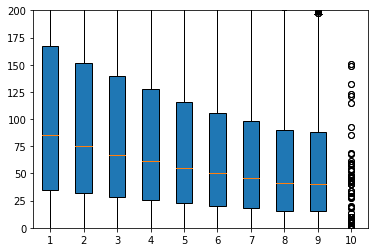

In [8]:
f.Validate_Synthetic_DataSet(Kernel_Matrix, survival_times)

In [9]:
print(max(survival_times))

338.0


In [10]:
covairates_survivaltimes = np.concatenate((X, survival_times[:,np.newaxis]),axis = 1)
cov_st_censored = np.concatenate((covairates_survivaltimes, np.ones((NUM_EMPLOYEES,1))),axis = 1)
bias_cov_st_censored = np.concatenate((np.ones((NUM_EMPLOYEES,1)), cov_st_censored),axis = 1)

In [11]:
df = pd.DataFrame(cov_st_censored)
if NUM_FEATURES == 5:
    df.columns = ['cov0', 'cov1','cov2','cov3','cov4','survival_time','censored']
elif NUM_FEATURES == 3:
    df.columns = ['cov0', 'cov1','cov2','survival_time','censored']
elif NUM_FEATURES == 10:
    df.columns = ['cov0', 'cov1','cov2','cov3', 'cov4', 'cov5', 'cov6','cov7', 'cov8', 'cov9','survival_time','censored']
file_name = str(NUM_EMPLOYEES) + "("+str(NUM_TRAIN) + "+" + str(NUM_VAL) + ")"+ str(NUM_FEATURES) + ".csv"
df.to_csv(file_name)

np_forMTLSA_tr = bias_cov_st_censored[:NUM_TRAIN]
np_forMTLSA_val = bias_cov_st_censored[NUM_TRAIN:]
file_name_tr = str(NUM_TRAIN) + "(" + str(NUM_EMPLOYEES)+"_tr)"+ str(NUM_FEATURES) + ".csv"
file_name_val = str(NUM_VAL) + "(" + str(NUM_EMPLOYEES) + "_val)" + str(NUM_FEATURES) + ".csv"
np.savetxt(file_name_tr, np_forMTLSA_tr, delimiter=",")
np.savetxt(file_name_val, np_forMTLSA_val, delimiter=",")